In [1]:
import pandas as pd

#yelp_business = pd.read_json('yelp_academic_dataset_business.json')


# read the entire file into a python array
with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = b'[' + b','.join(data) + b']'

# now, load it into pandas
data_df = pd.read_json(data_json_str)
data_df.head(10)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Parking': {'garage': False, 'validated': Fal...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Monday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{'Price Range': 1, 'Outdoor Seating': False, '...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
4,"{'Price Range': 2, 'Parking': {'garage': False...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Monday': {'close': '21:00', 'open': '10:00'}...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business
5,"{'Takes Reservations': False, 'Price Range': 1...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{'Wednesday': {'close': '19:00', 'open': '10:0...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,business
6,{'Good for Kids': False},VHYT1qgQw5JvXAlUDhTArA,"[Active Life, Trainers, Fitness & Instruction]",Pittsburgh,"2101 Greentree Rd Ste B201\nPittsburgh, PA 15220",{},40.390386,-80.070897,Extreme Fitness 2,[],True,3,2.5,PA,business
7,"{'Takes Reservations': False, 'Price Range': 1...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Monday': {'close': '02:00', 'open': '11:00'}...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,21,4.0,PA,business
8,{},b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Monday': {'close': '19:00', 'open': '07:30'}...",40.394588,-80.084454,Flynn's Tire And Auto Service,[],True,7,2.5,PA,business
9,{'Good for Kids': True},Sktj1eHQFuVa-M4bgnEh8g,"[Active Life, Mini Golf]",Carnegie,"920 Forsythe Rd\nCarnegie\nCarnegie, PA 15106",{},40.405404,-80.076267,Forsythe Miniature Golf & Snacks,[Carnegie],False,4,4.0,PA,business


In [2]:
types = set()
for i in data_df['type']:
    types.add(i)

print(types)


{'business'}


In [3]:
print(type(data_df['attributes'][0]))

<class 'dict'>


In [29]:
attributes = {}
import sys
rest_data_df = data_df[['Restaurants' in x for x in data_df['categories']]]
print(len(rest_data_df))
#rest_data_df = #pd.DataFrame(columns = data_df.columns.values)
#index = 0
#for i in data_df.itertuples():
#    if 'Restaurants' in i[3]:
#        rest_data_df.loc[index] = data_df.loc[i[0]] 
#        index += 1
     
count = 0.0
index = 0.0
from collections import defaultdict
counts = defaultdict(int)
for attr in rest_data_df['attributes']:
    counts[len(attr)] += 1
    index += 1
    for att in attr:
        if att not in attributes:
            attributes[att] = set()
        type1 = type(attr[att])
        if type1 is dict:
            for i in attr[att].values():
                if i != True and i != False:
                    sys.exit("Not true or false")
        
        attributes[att].add(type1)
print(counts)  
print(sum(counts.values()))
print(index)        
for a in attributes:
    print (a, attributes[a])
    print

25071
defaultdict(<class 'int'>, {0: 415, 1: 179, 2: 201, 3: 286, 4: 251, 5: 288, 6: 252, 7: 248, 8: 310, 9: 323, 10: 451, 11: 500, 12: 644, 13: 779, 14: 1071, 15: 940, 16: 1255, 17: 1874, 18: 4560, 19: 5250, 20: 2043, 21: 588, 22: 469, 23: 596, 24: 705, 25: 396, 26: 97, 27: 58, 28: 32, 29: 7, 30: 2, 31: 1})
25071
25071.0
Dietary Restrictions {<class 'dict'>}
Takes Reservations {<class 'bool'>}
Price Range {<class 'int'>}
Open 24 Hours {<class 'bool'>}
Waiter Service {<class 'bool'>}
Ambience {<class 'dict'>}
Corkage {<class 'bool'>}
Noise Level {<class 'str'>}
Parking {<class 'dict'>}
Drive-Thru {<class 'bool'>}
By Appointment Only {<class 'bool'>}
BYOB/Corkage {<class 'str'>}
Ages Allowed {<class 'str'>}
BYOB {<class 'bool'>}
Good For {<class 'dict'>}
Delivery {<class 'bool'>}
Outdoor Seating {<class 'bool'>}
Accepts Insurance {<class 'bool'>}
Wi-Fi {<class 'str'>}
Coat Check {<class 'bool'>}
Order at Counter {<class 'bool'>}
Accepts Credit Cards {<class 'bool'>}
Happy Hour {<class '

In [5]:

    
def printStuff(attributeName):
    yesses = 0.0
    yesStars = 0.0
    nos = 0.0
    nosStars = 0.0
    for attr in data_df['attributes']:
        for att in attr:
            if att == attributeName:
                if attr[att] == True:
                    yesses += 1.0
                    yesStars += 
                else:
                    nos += 1.0

    print (nos)
    print (yesses)
    print ("percent discussing", attributeName, (yesses+nos) / len(data_df))
    print ("of those discussing, yesses", yesses/(yesses+nos))
    print ("of those discussing, noes", nos/(yesses+nos)  )
    print ("\n\n")

for attributeName in attributes:
    for t in attributes[attributeName]:
        if t == type(True):
            printStuff(attributeName)
    


14819.0
8253.0
percent discussing Takes Reservations 0.29791464910581705
of those discussing, yesses 0.35770631067961167
of those discussing, noes 0.6422936893203883



293.0
28.0
percent discussing Open 24 Hours 0.004144877009490606
of those discussing, yesses 0.08722741433021806
of those discussing, noes 0.9127725856697819



8061.0
13271.0
percent discussing Waiter Service 0.27544709148427915
of those discussing, yesses 0.622117007312957
of those discussing, noes 0.37788299268704295



501.0
130.0
percent discussing Corkage 0.008147717735166893
of those discussing, yesses 0.20602218700475436
of those discussing, noes 0.7939778129952456



1830.0
1495.0
percent discussing Drive-Thru 0.042933694880237586
of those discussing, yesses 0.4496240601503759
of those discussing, noes 0.5503759398496241



6243.0
5501.0
percent discussing By Appointment Only 0.15164310155594293
of those discussing, yesses 0.4684094005449591
of those discussing, noes 0.5315905994550408



806.0
43.0
percent dis

In [6]:
attributes = dict()
count = 0
for attributes in data_df['attributes']:
    for attribute in attributes:
        if type(attr[att]) == dict:
            print(att, attr[att])
            count += 1
    if count >= 5: break

In [7]:
count = 0.0
total = 0.0
for cats in data_df['categories']:
    if 'Restaurants' in cats:
        count += 1
    total += 1
print(count, total, count/total)

25071.0 77445.0 0.32372651559171023


In [14]:
writer = pd.ExcelWriter('pandas.xlsx', engine = 'xlsxwriter')
rest_data_df.to_excel(writer, sheet_name = 'Sheet1')
writer.save()

In [10]:
print(data_df.size)

1161675


In [11]:
len(data_df.index)

77445

In [13]:
writer = pd.ExcelWriter('pandas_all.xlsx', engine = 'xlsxwriter')
data_df.to_excel(writer, sheet_name = 'Sheet1')
writer.save()

In [18]:
count = 0.0
total = 0.0
for cats in data_df['state']:
    if cats == 'TX':
        count += 1
    total += 1
print(count, total, count/total)

2.0 77445.0 2.582477887533088e-05


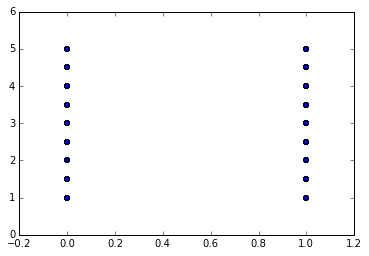

In [43]:
attrName = 'Takes Reservations'
indep_data = []
dep_data = []

ratings = set()
for index, row in rest_data_df.iterrows():
    if attrName in row['attributes']:
        indep_data.append((row['attributes'][attrName], row['stars']))
        #dep_data.append(row['stars'])
    
#for i in ratings:
#print(sorted(list(ratings)))   

import matplotlib.pyplot as plt
plt.scatter([x[0] for x in indep_data], [x[1] for x in indep_data])


In [42]:
count = 0.0
total = 0.0
import numpy as np
np.mean(data_df['stars'])
    

3.6934146813867907

In [ ]:
attrName = 'Takes Reservations'
attr_df = data_df[[attrName in x for x in data_df['attributes']]]
